In [2]:
#############
###paths#####
#############
import sys
import os

pwd = os.getcwd()
modellingpath = pwd.rpartition("modelling")[0] + pwd.rpartition("modelling")[1] 
sys.path.append(modellingpath + '/lib')
#############
import pickle as pkl
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from equations.class_subcircuit_eq import *
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit


In [5]:
def plotDoseResponse2(inducer,doseResponseRed, doseResponseGreen,semRed, semGreen, pad=0.01, inducerName = '[OC14]'):
    fig,ax = plt.subplots()

    ax.plot(inducer,doseResponseRed,label='RFP', c='red')
    ax.errorbar(inducer,doseResponseRed,yerr=semRed,c='red',fmt='o')
    ax.legend(loc='center left') #upper right
    # ax.ticklabel_format(useOffset=False)
    ax.set_xscale('log')
    ax.set_xlabel(inducerName)
    ax.set_ylim(0,np.amax(doseResponseRed)*1.1)
    ax.set_ylabel('RFP / ($A_{600}$ $RFP_{basal})$')
    ax2=ax.twinx()
    ax2.plot(inducer,doseResponseGreen,label='GFP', c='green')
    ax2.errorbar(inducer,doseResponseGreen,yerr=semGreen,c='green',fmt='o')
    ax2.legend(loc='center right') #upper left
    # ax2.ticklabel_format(useOffset=False)
    ax.set_xscale('log')
    ax2.set_xlabel(inducerName)
    ax2.set_ylim(0,np.amax(doseResponseGreen)*1.1)
    ax2.set_ylabel('GFP / ($A_{600}$ $GFP_{basal})$')

    plt.show()
    
def plotDoseResponsevsData(inducer,inducer_continuous, rfpExp_list, gfpExp_list, semRed, semGreen, doseResponseRed,doseResponseGreen,pad=0.01):
    fig,ax = plt.subplots()

    ax.plot(inducer_continuous,doseResponseRed,label='RFP', c='red')
    ax.scatter(inducer,rfpExp_list, c='red')
    ax.errorbar(inducer,rfpExp_list,yerr=semRed,c='red',fmt='o')
    ax.legend(loc='center left') #upper right
    ax.set_ylabel('RFP / ($A_{600}$ $RFP_{basal})$')
    ax.set_xscale('log')


    ax2=ax.twinx()
    ax2.plot(inducer_continuous,doseResponseGreen,label='GFP', c='green')
    ax2.scatter(inducer,gfpExp_list, c='green')
    ax2.errorbar(inducer,gfpExp_list,yerr=semGreen,c='green',fmt='o')
    ax2.legend(loc='center right') #upper left
    ax2.set_ylabel('GFP / ($A_{600}$ $GFP_{basal})$')
    ax.set_xscale('log')


    plt.show()

def plotDoseResponse(inducer_list, U_ss, color='k'):
    plt.plot(inducer_list,U_ss, c=color)
    plt.xlabel('[inducer]')
    plt.ylabel('Fluorescence')
    plt.xscale('log')
    plt.show()

def doseResponse(subcircuit, inducer_list, initial_conditions=[10,10]):
    U_ss = []
    T=1000
    t = np.linspace(0, T, T*50)
    for inducer in inducer_list:
        sol = odeint(subcircuit.ddt, initial_conditions, t, args=(inducer,inducer))
        Ustar_ODE=sol[-1]
        U_ss.append(sol[-1])
    return np.array(U_ss)


def gfp_steadystate(OC14,muv, Vf, kv, Kvb, nvb): 
    F = 1 + Vf*(1/(1+((muv*Kvb)/(kv*OC14 + 1e-8))**nvb))
    return F

def rfp_steadystate(F,Ve,Kfe,nfe): 
    E = 1 + Ve*(1/(1+(F/(Kfe+1e-8))**nfe))
    return E

def subcircuit11_doseResponse(OC14,muv, Vf, kv, Kvb, nvb,Ve,Kfe,nfe):
    F = 1 + Vf*(1/(1+((muv*Kvb)/(kv*OC14 + 1e-8))**nvb))
    E = 1 + Ve*(1/(1+(F/(Kfe+1e-8))**nfe))
    return E,F



## Subcircuit 1

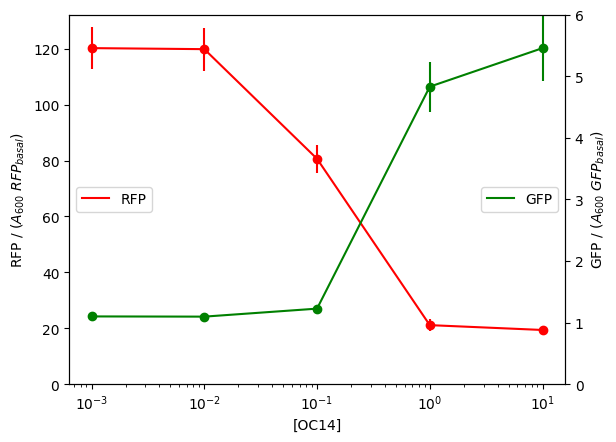

[19.38144662074574, 21.1148862071612, 80.6512419250554, 119.9001793483836, 120.26952911563737] [5.4555320840801516, 4.829766731868398, 1.2256962066379398, 1.0958017541888272, 1.099233769296941] [0.11646754 2.05594104 5.10554887 7.6974541  7.59889038] [0.52599883 0.40810658 0.01980029 0.00104578 0.00122158]


[19.38144662074574,
 21.1148862071612,
 80.6512419250554,
 119.9001793483836,
 120.26952911563737]

In [29]:
doseResponseExp = pkl.load(open('input/subcircuit1_circuit14_doseResponse_maxATC.pkl','rb'))
AHL_list = list(doseResponseExp['AHL_list']); gfpExp_list = list(doseResponseExp['maxATC_doseResponse_gfp']); rfpExp_list = list(doseResponseExp['maxATC_doseResponse_rfp'])
semRed = doseResponseExp['maxATC_doseResponse_rfp_sem']; semGreen = doseResponseExp['maxATC_doseResponse_gfp_sem']


plotDoseResponse2(AHL_list, rfpExp_list, gfpExp_list, semRed, semGreen)
print(rfpExp_list, gfpExp_list, semRed, semGreen)
rfpExp_list

[1.7763806057944516, 3.5206065622464147]
[0.1429093  4.46235044 0.1964499  0.57163721 2.05145285]


/var/folders/bt/1cqt3cks1sl9cz4dfwlyxhpm0000gn/T/ipykernel_34454/3890146764.py:6: RuntimeWarning: invalid value encountered in power
  F = 1 + Vf*(1/(1+((muv*Kvb)/(kv*OC14 + 1e-8))**nvb))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


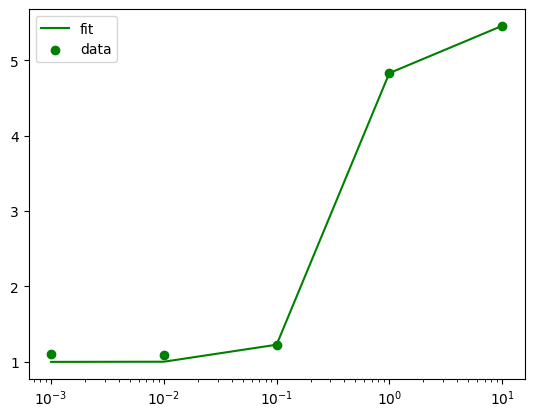

/var/folders/bt/1cqt3cks1sl9cz4dfwlyxhpm0000gn/T/ipykernel_34454/3890146764.py:10: RuntimeWarning: invalid value encountered in power
  E = 1 + Ve*(1/(1+(F/(Kfe+1e-8))**nfe))


[1.98019963e+07 5.58620894e-05 1.23053617e+00]


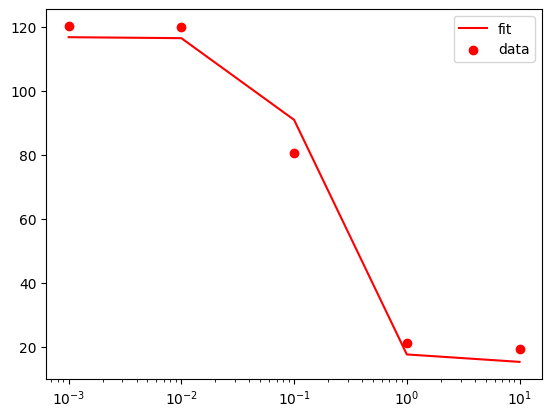

[0.0009584171146049832, 0.01573805135906077]

In [20]:
from scipy.optimize import curve_fit
OC14_list = np.logspace(1,-3, 5)


def gfp_steadystate(OC14,muv, Vf, kv, Kvb, nvb): 
    F = 1 + Vf*(1/(1+((muv*Kvb)/(kv*OC14 + 1e-8))**nvb))
    return F

def rfp_steadystate(F,Ve,Kfe,nfe): 
    E = 1 + Ve*(1/(1+(F/(Kfe+1e-8))**nfe))
    return E

def steadystate(OC14,muv, Vf, kv, Kvb, nvb,Ve,Kfe,nfe):
    F = 1 + Vf*(1/(1+((muv*Kvb)/(kv*OC14 + 1e-8))**nvb))
    E = 1 + Ve*(1/(1+(F/(Kfe+1e-8))**nfe))
    return E,F

def loss(data,model):
    mean_data = np.mean(data)
    relError = np.sum(np.square(data - model))/np.sum(np.square(data - mean_data))
    return relError

data = np.array([gfpExp_list,rfpExp_list])
p0=[1, 5, 0.1,4,1, 120, 0.1,4]
model = steadystate(OC14_list, *p0)
print([loss(data[x],model[x]) for x in range(2)])


parametersgreen, covariance = curve_fit(gfp_steadystate, AHL_list, gfpExp_list, p0=[1, 5, 0.1,4,1], maxfev=5000)
print(parametersgreen)
gfpFit = gfp_steadystate(OC14_list, *parametersgreen)
plt.plot(OC14_list,gfpFit , label='fit', c='green')
plt.scatter(AHL_list,gfpExp_list , label='data', c='green')
plt.xscale('log')
plt.legend()
plt.show()

# print(f'mu = {parameters[0]}, V = {parameters[1]}, km = {parameters[2]}, n = {parameters[3]}')

parametersred, covariance = curve_fit(rfp_steadystate, gfpFit, rfpExp_list, p0=[120, 0.1,4], maxfev=10000000)
print(parametersred)
rfpFit = rfp_steadystate(gfpFit, *parametersred)
plt.plot(OC14_list,rfpFit , label='fit', c='red')
plt.scatter(OC14_list,rfpExp_list , label='data', c='red')
plt.xscale('log')
plt.legend()
plt.show()
# print(f'mu = {parameters[0]}, V = {parameters[1]}, km = {parameters[2]}, n = {parameters[3]}')
data = np.array([gfpExp_list,rfpExp_list])
model = np.array([gfpFit,rfpFit])
pfit = np.concatenate((parametersgreen,parametersred))

[loss(data[x],model[x]) for x in range(2)]


Step 2: Hesian


In [10]:
def fullLoss(data, OC14_list, p):
    model = steadystate(AHL_list, *p)
    # plt.plot(AHL_list,model[1] , label='fit', c='green')
    # plt.scatter(AHL_list,gfpExp_list , label='data', c='green')
    # plt.xscale('log')
    # plt.show()
    # plt.plot(AHL_list,model[0] , label='fit', c='red')
    # plt.scatter(AHL_list,rfpExp_list , label='data', c='red')
    # plt.xscale('log')
    # plt.show()

array([1.42909303e-01, 4.46235044e+00, 1.96449900e-01, 5.71637214e-01,
       2.05145285e+00, 1.98019963e+07, 5.58620894e-05, 1.23053617e+00])

In [8]:
def fullLoss(data, OC14_list, p):
    model = steadystate(AHL_list, *p)
    return [loss(data[x],model[x]) for x in range(2)]
data = np.array([rfpExp_list, gfpExp_list])
OC14_list = np.logspace(1,-3, 5)
p0=[1, 5, 0.1,4,1, 120, 0.1,4]
print(fullLoss(data, OC14_list, p0))
print(fullLoss(data, OC14_list, pfit))

[3.524098364450223, 1.3254258989168515]
[0.01573805135906077, 0.0009584171146049832]


In [30]:
import jax

from jax.config import config
config.update("jax_debug_nans", True)


def steadystate(OC14,muv, Vf, kv, Kvb, nvb,Ve,Kfe,nfe):
    # OC14 = [10.0, 1.0, 0.1, 0.01, 0.001]
    F = 1 + Vf*(1/(1+((muv*Kvb)/(kv*OC14 + 1e-8))**nvb ))
    E = 1 + Ve*(1/(1+(F/(Kfe+1e-8))**nfe))
    return E,F

def loss(data,model):
    mean_data = np.mean(data)
    relError = jax.numpy.sum(jax.numpy.square(data - model))/(jax.numpy.sum(jax.numpy.square(data - mean_data))+1e-8)
    # relError = data - model
    return relError
# steadystate = lambda x: [1 + x[0]*(1/(1+((x[1]*x[2])/(x[3]*AHL_list + 1e-8))**x[4] )), 1 + x[5]*(1/(1+((1 + x[0]*(1/(1+((x[1]*x[2])/(x[3]*AHL_list + 1e-8))**x[4] )))/(x[6]+1e-8))**x[7]))]

def func(p):
    loss_i = 0
    AHL_list = [10.0, 1.0, 0.1, 0.01, 0.001]
    rfpExp_list = [19.38144662074574, 21.1148862071612, 80.6512419250554, 119.9001793483836, 120.26952911563737] 
    gfpExp_list = [5.4555320840801516, 4.829766731868398, 1.2256962066379398, 1.0958017541888272, 1.099233769296941]
    data = [rfpExp_list,gfpExp_list]
    # p1,p2,p3,p4,p5,p6,p7,p8 = p
    # for OC14 in AHL_list:
    # model = steadystate(AHL_list[0],*p)
    # # print(model, data[0][0])
    # return jax.numpy.sum(loss(data[x][0],model[x]) for x in range(2))
    for count,OC14 in enumerate(AHL_list):
      model = steadystate(AHL_list[0],*p)
      loss_i+=(loss(data[0][count],model[0]) + loss(data[1][count],model[1]))
      # loss_i+=np.sum(loss(data[x][count],model[x]) for x in range(2))
    return loss_i
# steadystate = lambda x: [1 + x[0]*(1/(1+((x[1]*x[2])/(x[3]*AHL_list + 1e-8))**x[4] )), 1 + x[5]*(1/(1+((1 + x[0]*(1/(1+((x[1]*x[2])/(x[3]*AHL_list + 1e-8))**x[4] )))/(x[6]+1e-8))**x[7]))]
# g = lambda x: x[0]**3 - 2*x[0]*x[1] - x[1]**6
p1,p2,p3,p4,p5,p6,p7,p8 = pfit
jax.hessian(func)(jax.numpy.array([p1, p2, p3, p4, p5, p6, p7, p8]))


RuntimeError: This version of jaxlib was built using AVX instructions, which your CPU and/or operating system do not support. You may be able work around this issue by building jaxlib from source.

In [23]:
# Python program to compute Hessian in PyTorch
# importing libraries
import torch
from torch.autograd.functional import hessian

def steadystate(OC14,muv, Vf, kv, Kvb, nvb,Ve,Kfe,nfe):
    F = 1 + Vf*(1/(1+((muv*Kvb)/(kv*OC14 + 1e-8))**nvb))
    E = 1 + Ve*(1/(1+(F/(Kfe+1e-8))**nfe))
    return E,F

def loss(data,model):
    mean_data = torch.mean(data)
    relError = torch.sum(torch.square(data - model))/torch.sum(torch.square(data - mean_data))
    return relError



def func(p1,p2,p3,p4,p5,p6,p7,p8):
    p = p1,p2,p3,p4,p5,p6,p7,p8
    model = steadystate(AHL_list, *p)
    return [loss(data[x],model[x]) for x in range(2)]

# defining a function
# def func(x, y, z):
#     return (2*x.pow(2)*y + x*z.pow(3) - 10)
  
# defining the inputs
input_p1 = torch.tensor([1.])
input_p2 = torch.tensor([2.])
input_p3 = torch.tensor([3.])
input_p4 = torch.tensor([1.])
input_p5 = torch.tensor([2.])
input_p6 = torch.tensor([3.])
input_p7 = torch.tensor([1.])
input_p8 = torch.tensor([2.])

# input_y = torch.tensor([2.])
# input_z = torch.tensor([3.])
# input_x = torch.tensor([1.])
# input_y = torch.tensor([2.])
# input_z = torch.tensor([3.])
  
#inputs = (input_x, input_y, input_z)
  
# compute the hessian
# output = hessian(func, (input_x, input_y, input_z))
output = hessian(func, (input_p1, input_p2, input_p3, input_p4, input_p5, input_p6, input_p7, input_p8))


# printing the above computed hessian
print("Hessian Tensor:\n", output)



TypeError: only integer tensors of a single element can be converted to an index

Step 1: load parameter distributions (prior)


In [6]:

# Specify name of circuit and variant investigated
circuit_n='circuit14'
variant='1nd'
# Specifiy number of parameter sets in parameterset file to be loaded
n_param_sets = 1000000

print(f'Circuit:{circuit_n}, Variant:{variant}')

df_full= pkl.load( open(modellingpath + "/3954/paper/input/balanced_parameterfiles/df_%s_variant%s_%rparametersets_balanced.pkl"%(circuit_n,variant,n_param_sets), "rb"))
df = df_full[['VE','VF','muLVA','Kbd','Kfe','Kee','nbd','nfe','nee','Kee']]
df_balanced = df_full[df_full['balance'] == 'Balanced']
df_balanced = df_balanced[['VE','VF','muLVA','Kbd','Kfe','Kee','nbd','nfe','nee','Kee']]

df_balanced

Circuit:circuit14, Variant:1nd


,VE,VF,muLVA,Kbd,Kfe,Kee,nbd,nfe,nee,Kee
0,98.603756,702.461106,3.394454,3.950182,163.978807,0.01,2.0,4.0,4.0,0.01
1,155.554552,999.253725,3.414466,16.006643,5.421244,0.01,2.0,4.0,4.0,0.01
2,41.532850,301.720176,3.938688,4.455242,177.921211,0.01,2.0,4.0,4.0,0.01
3,267.681731,281.612052,3.228803,3.996837,160.291891,0.01,2.0,4.0,4.0,0.01
4,87.049174,444.717315,3.310359,9.380993,3.794104,0.01,2.0,4.0,4.0,0.01
...,...,...,...,...,...,...,...,...,...,...
999995,959.542199,327.439791,3.878041,230.128112,318.746343,0.01,2.0,4.0,4.0,0.01
999996,388.291530,321.379872,4.300639,93.888140,8.147470,0.01,2.0,4.0,4.0,0.01
999997,33.243426,22.027648,3.529508,35.031485,4.000563,0.01,2.0,4.0,4.0,0.01
999998,289.991435,52.842083,4.223485,2.607937,3.752162,0.01,2.0,4.0,4.0,0.01


In [7]:
subcircuit = lambda x: subcircuit1_circuit14(x)

# par_dict['VE'] = pars[0]

Step 2: Sample from prior


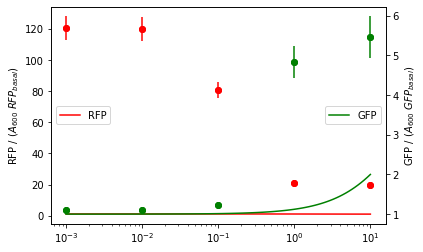

<ipython-input-42-d7f78662f15c>:4: RuntimeWarning: invalid value encountered in power
  F = 1 + Vf*(1/(1+((muv*Kvb)/(kv*OC14 + 1e-8))**nvb))


`ftol` termination condition is satisfied.
Function evaluations 195, initial cost 7.0630e+00, final cost 6.2124e+00, first-order optimality 4.08e-05.


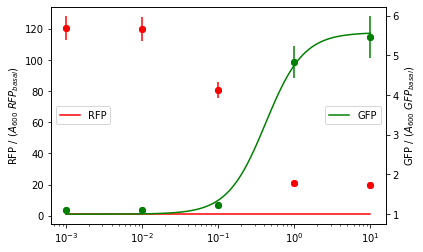

In [42]:
from scipy.optimize import least_squares

def steadystate(OC14,muv, Vf, kv, Kvb, nvb,Ve,Kfe,nfe):
    F = 1 + Vf*(1/(1+((muv*Kvb)/(kv*OC14 + 1e-8))**nvb))
    E = 1 + Ve*(1/(1+(F/(Kfe+1e-8))**nfe))
    return E,F

def loss(data,model):
    mean_data = np.mean(data)
    relError = np.sum(np.square(data - model))/np.sum(np.square(data - mean_data))
    return relError

samples = np.zeros((10000,2))
params_samples = np.zeros((10000,8))
index_arr = np.zeros(1)
def residualDoseResponse(pars, samples, params_samples, index_arr):
    # par_dict2_data = df_balanced.iloc[0].to_dict()
    # par_dict1 = {}
    # for count,key in enumerate(par_dict2_data.keys()):
    #     par_dict1[key] = pars[count]

    U_ss= steadystate(AHL_list, *pars)
    # data = np.array([rfpExp_list, gfpExp_list]).T
    data =[rfpExp_list, gfpExp_list]
    # U_ss= steadystate(OC14_list, *p0)

    relError = [loss(data[x], U_ss[x]) for x in range(2)]
    # relError = [np.sum(np.square(data - U_ss1)[:,x])/np.sum(np.square(data[:,x] - mean_list[x])) for x in range(2)]
    index = int(index_arr[0])
    samples[index,:] = relError
    params_samples[index, :] = pars
    index_arr[0] += 1
    return relError


OC14_list = np.logspace(-3,1, 100)

p0=[1, 5, 0.1,4,1,120, 0.1,3]

U_ss= steadystate(OC14_list, *p0)
plotDoseResponsevsData(AHL_list,OC14_list,rfpExp_list,gfpExp_list,semRed, semGreen,  U_ss[0] ,U_ss[1] )
# # plotDoseResponsevsData(AHL_list,A_list,gfpExp_list,gfpExp_list,semGreen, semGreen,  U_ss[:,1] ,U_ss[:,1] )


# pars = [x for x in par_dict.values()]
r = least_squares(residualDoseResponse,p0, max_nfev=1000000 , verbose=1, args=(samples, params_samples, index_arr))
pfit = r['x']

U_ss= steadystate(OC14_list, *pfit)
plotDoseResponsevsData(AHL_list,OC14_list,rfpExp_list,gfpExp_list,semRed, semGreen,  U_ss[0] ,U_ss[1] )
# new_par_dict = {}
# for count,key in enumerate(par_dict.keys()):
#     new_par_dict[key] = x[count]
# print('pardict1', par_dict)
# print('')
# print('')

# print('pardict_final', new_par_dict)
# print('')

# U_ss= doseResponse(subcircuit(new_par_dict), OC14_list)
# plotDoseResponsevsData(AHL_list,OC14_list,rfpExp_list,gfpExp_list,semRed, semGreen,  U_ss[:,0] ,U_ss[:,1] )
# # plotDoseResponsevsData(AHL_list,A_list,gfpExp_list,gfpExp_list,semGreen, semGreen,  U_ss[:,1] ,U_ss[:,1] )


In [29]:
U_ss

(array([1.11983525, 1.11983088, 1.11982607, 1.1198208 , 1.11981502,
        1.11980867, 1.11980171, 1.11979406, 1.11978567, 1.11977647,
        1.11976637, 1.11975528, 1.11974312, 1.11972977, 1.11971512,
        1.11969905, 1.11968141, 1.11966206, 1.11964083, 1.11961753,
        1.11959197, 1.11956393, 1.11953317, 1.11949941, 1.11946239,
        1.11942177, 1.11937722, 1.11932835, 1.11927475, 1.11921596,
        1.11915149, 1.1190808 , 1.11900328, 1.11891829, 1.11882511,
        1.11872298, 1.11861103, 1.11848835, 1.11835392, 1.11820664,
        1.11804531, 1.11786863, 1.11767516, 1.11746336, 1.11723156,
        1.11697793, 1.1167005 , 1.11639713, 1.11606551, 1.11570315,
        1.11530737, 1.11487529, 1.11440381, 1.11388962, 1.1133292 ,
        1.1127188 , 1.11205442, 1.11133187, 1.11054673, 1.10969438,
        1.10877001, 1.10776864, 1.10668519, 1.10551446, 1.10425125,
        1.10289037, 1.10142675, 1.09985551, 1.09817211, 1.09637239,
        1.09445281, 1.09241049, 1.09024345, 1.08

In [22]:
from numpy import diff# plt.scatter(params_samples[:int(index_arr[0]),0],samples[:int(index_arr[0]),0])
p1 =  params_samples[:int(index_arr[0]),0]
p2 =  params_samples[:int(index_arr[0]),2]
l = samples[:int(index_arr[0]),0]
dy = diff(l)/diff(p1)

# plt.scatter(params_samples[:int(index_arr[0]),1], samples[:int(index_arr[0]),0])

# plt.yscale('log')

NameError: name 'diff' is not defined

In [ ]:
import pandas as pd
r_df = pd.read_csv('r.csv')
plt.plot(r_df['Iteration'],r_df['Cost'] , c = 'darkslategrey', label='Cost')
plt.plot(r_df['Iteration'],r_df['Cost Reduction'],  c = 'lightseagreen',label='Cost Reduction')
plt.yscale('log')
plt.legend()
